In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakePulse, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse, RandomPhase

In [2]:

pulse_maker = MakePulse(N=128*20, Delta_f=1)

central_f = 0.275
phase = PolynomialPhase(0.3, (0,0,0,50))
amp = GaussianAmplitude((1,0.4,0.1), (0.275,0.35,0.2), (0.1,0.2,0.01))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))

input_pulses = pulse_maker.pulses



# central_f = np.array([0.3])
# phase = PolynomialPhase(central_frequency=central_f, coefficients = np.array([0, 0, -250]))
# amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.05]))
# _, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


# delay, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", cross_correlation=True,
#                                                           gate=(frequency_gate, pulse_f_gate), real_fields=False, interpolate_fft_conform=True,
#                                                           N=128*2, scale_time_range=1.5, plot_stuff=True, cut_off_val=0.0001)#, frequency_range=(0.1,1.4))

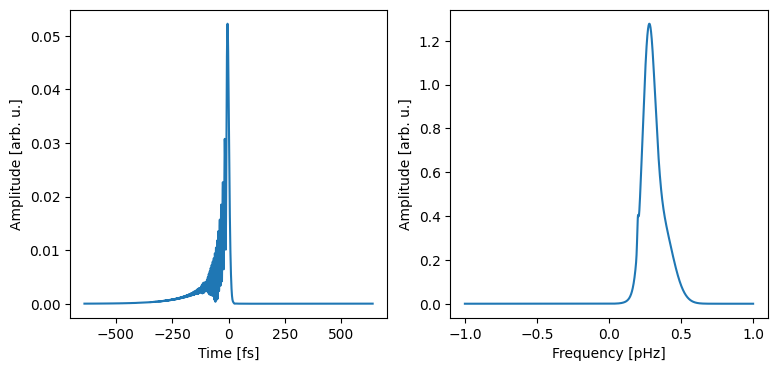

In [3]:
#time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, RandomPhase()))
pulse_maker.plot_pulses()

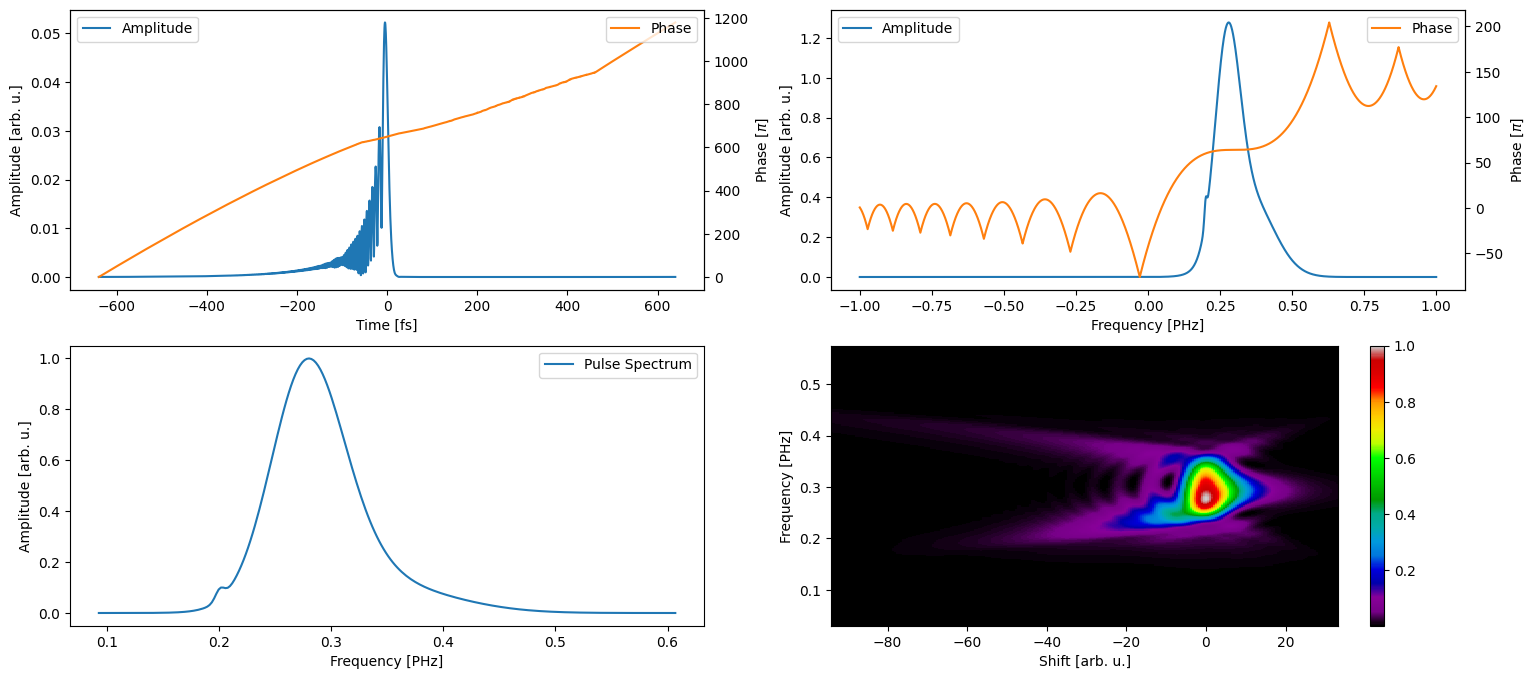

In [4]:
time, frequency, trace, spectra = pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "pg", 
                                                            cross_correlation=False, ifrog=False, gate=(None, None), real_fields=False, 
                                                            frequency_range=None, N=256, cut_off_val=0.01, interpolate_fft_conform=False, 
                                                            scale_time_range=1, plot_stuff=True)

In [5]:
pulse_maker.__dict__

{'N': 2560,
 'Delta_f': 1,
 'maketrace': <src.simulate_trace.make_trace.MakeTraceFROG at 0x7657d103c6d0>,
 'frequency': array([-1.        , -0.99921844, -0.99843689, ...,  0.99843689,
         0.99921844,  1.        ], shape=(2560,)),
 'df': np.float64(0.0007815552950371239),
 'time': array([-639.75      , -639.25019531, -638.75039062, ...,  638.25058594,
         638.75039062,  639.25019531], shape=(2560,)),
 'sk': Array([-7.5658769e-05-1.j        , -1.1361352e-03+0.99999934j,
         2.3479275e-03-0.99999726j, ..., -3.5597163e-03-0.9999937j ,
         2.3479275e-03+0.99999726j, -1.1361352e-03-0.99999934j],      dtype=complex64),
 'rn': Array([ 1.        +0.0000000e+00j, -1.        -3.8941437e-07j,
         1.        +7.7882873e-07j, ..., -0.9999987 -1.6339783e-03j,
         0.99999934+1.1367887e-03j, -0.99999934-1.1278798e-03j],      dtype=complex64),
 'pulses': MyNamespace(time: [shape=(2560,), dtype(float64)], frequency: [shape=(2560,), dtype(float64)], pulse_t: [shape=(2560,), dt